In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install -U git+https://github.com/qubvel/efficientnet
! pip install tensorflow-addons
! pip install git+https://github.com/qubvel/classification_models.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-brxffgp2
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-brxffgp2
     |████████████████████████████████| 50 kB 7.0 MB/s 
  Created wheel for efficientnet: filename=efficientnet-1.1.1-py3-none-any.whl size=18447 sha256=6c5178c3e4e2080e51f46543e1baf032fa9f8e59a82809fcfb29354e33bfe899
  Stored in directory: /tmp/pip-ephem-wheel-cache-hzlm1zmv/wheels/11/69/85/814d64d694c96db0eef17b718042d644a1e54f113920481920
Successfully built efficientnet
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 31.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-r0alfql

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
from efficientnet.keras import EfficientNetB2

In [ ]:
test_path = '/content/drive/MyDrive/data_set/data_set/test'
test_datagen = ImageDataGenerator(
    rescale = 1/255    #rescale the tensor values to [0,1]
)

test_generator = test_datagen.flow_from_directory(
    directory = test_path,
    classes=['real', 'fake'],
    target_size = (224,224),
    color_mode = "rgb",
    class_mode = None,
    batch_size = 32,
    shuffle = False
)

Found 2443 images belonging to 2 classes.


In [ ]:
import os
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model, Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, InputSpec, Layer, BatchNormalization, Convolution2D
from tensorflow.keras.layers import AveragePooling2D, AveragePooling1D, MaxPooling2D, MaxPooling1D
from tensorflow_addons.layers import SpatialPyramidPooling2D

In [ ]:
new_model = load_model('/content/drive/MyDrive/model_checkpoint/Moblide_net.h5')

In [ ]:
test_generator.reset()
preds = new_model.predict(test_generator, verbose = 1)

77/77 [==============================] - 8s 92ms/step


In [ ]:
print(preds)

[[1.6279396e-06 9.9999833e-01]
 [3.5435524e-10 1.0000000e+00]
 [1.6298093e-10 1.0000000e+00]
 ...
 [1.0000000e+00 3.9382468e-14]
 [1.0000000e+00 1.2853419e-14]
 [1.0000000e+00 5.1449112e-15]]


In [ ]:
from keras.utils import np_utils
from imutils import paths
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
import os

path_reals = list(paths.list_images('/content/drive/MyDrive/data_set/data_set/test/real'))
labels_real = []

for path_real in path_reals:
	label2 = path_real.split(os.path.sep)[-2]
	labels_real.append(label2)
 
path_fakes = list(paths.list_images('/content/drive/MyDrive/data_set/data_set/test/fake'))
labels_fake = []

for path_fake in path_fakes:
	label3 = path_fake.split(os.path.sep)[-2]
	labels_fake.append(label3)
 
labels_test = labels_real + labels_fake

In [ ]:
print(labels_test[2])
print(labels_test[500])

real
real


In [ ]:
le = LabelEncoder()
labels_test = le.fit_transform(labels_test)
labels_test = np_utils.to_categorical(labels_test, 2)

f = open('le.pickle', "wb")
f.write(pickle.dumps(le))
f.close()

In [ ]:
print(labels_test[2])
print(labels_test[500])

[0. 1.]
[0. 1.]


In [ ]:
from sklearn.metrics import classification_report

test = np.argmin(labels_test, axis=1)
pred = np.argmin(preds, axis=1)
print(classification_report(test, pred, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

        fake    0.99597   0.99899   0.99748       990
        real    0.99931   0.99725   0.99828      1453

    accuracy                        0.99795      2443
   macro avg    0.99764   0.99812   0.99788      2443
weighted avg    0.99796   0.99795   0.99795      2443



In [ ]:
print(test)
print(pred)

[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]


[[ 989    1]
 [   4 1449]]


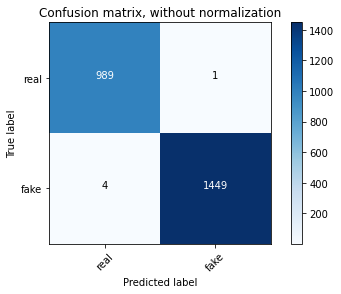

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test, pred)
print(cnf_matrix)
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.5f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  
class_names = ['real', 'fake']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

In [ ]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, _ = roc_curve(test, pred, pos_label=1)

fnr = 1 - tpr
fpr_eer = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
fnr_eer = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
eer = min(fpr_eer, fnr_eer)
print("tpr = ", tpr)
print("fpr = ", fpr)
print("eer = ", eer)

tpr =  [0.         0.99724708 1.        ]
fpr =  [0.        0.0010101 1.       ]
eer =  0.00101010101010101


In [ ]:
print(auc(test, pred))

0.5


threshold at eer =  1
eer =  0.00101010101010101


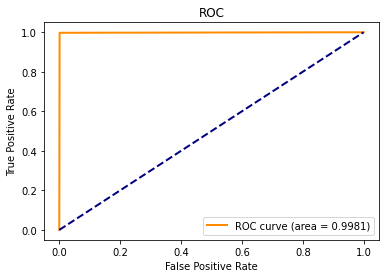

In [ ]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt
from itertools import cycle

fpr, tpr, threshold = roc_curve(test, pred, pos_label=1)
fnr = 1 - tpr
fpr_eer = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
fnr_eer = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
eer = min(fpr_eer, fnr_eer)
print("threshold at eer = ", eer_threshold)
print("eer = ", eer)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()